# GALAXY CLASSIFIER

This IPython Notebook contains the Python code for implementing a Convolution Neural Network(CNN) Architecture for Classification of Galaxy Images into it's 3 corresponding classes- Spiral type, Ireegular type and Elliptical type. The model was trained on Nvidia 960MX GPU followed by an intensive training on the NVIDIA DGX 1 Octa Tesla V100 Supercomputer servers using technologies like Putty and WinSCP. On training for 40 epochs, it was observed the training accuracy was at 95.00% with training loss at 15.37% while Validation accuracy was at 94.75% and Validation loss at 15.31%. The Training set containing 3 classes were a total of 3232 images while the Validation set containing the same number of classes contained 1190 images. 

In [58]:
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import h5py
import warnings
from keras import backend as K
import os
import timeit
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [49]:
num_classes=3
input_shape=(128,128,3)

In [50]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='tanh', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 124, 124, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
__________

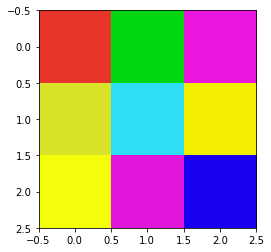

In [38]:
%matplotlib inline
top_layer = model.layers[0]
fig = plt.gcf()
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')

In [39]:
fig.savefig('Filter_1st_layer.png')

In [27]:
start = timeit.default_timer()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics=['accuracy'])
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'training_set',
        target_size=(256, 256),
        batch_size=64,
        class_mode='categorical' )

test_set = test_datagen.flow_from_directory(
        'val_set',
        target_size=(256, 256),
        batch_size=64,
        class_mode='categorical')


classifier = model.fit_generator(
        training_set,
        steps_per_epoch=10,
        epochs=100,
        validation_data=test_set,
        validation_steps=100)

end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds") 

Found 3232 images belonging to 3 classes.
Found 1190 images belonging to 3 classes.
Epoch 1/40
10/10 [==============================] - 145s 15s/step - loss: 0.8451 - acc: 0.6109 - val_loss: 0.6192 - val_acc: 0.7006
Epoch 2/40
10/10 [==============================] - 147s 15s/step - loss: 0.5722 - acc: 0.7203 - val_loss: 0.4876 - val_acc: 0.8201
Epoch 3/40
10/10 [==============================] - 148s 15s/step - loss: 0.4967 - acc: 0.7797 - val_loss: 0.4246 - val_acc: 0.8818
Epoch 4/40
10/10 [==============================] - 145s 15s/step - loss: 0.4141 - acc: 0.8375 - val_loss: 0.3179 - val_acc: 0.8837
Epoch 5/40
10/10 [==============================] - 146s 15s/step - loss: 0.3800 - acc: 0.8688 - val_loss: 0.3024 - val_acc: 0.9010
Epoch 6/40
10/10 [==============================] - 150s 15s/step - loss: 0.3018 - acc: 0.9016 - val_loss: 0.3526 - val_acc: 0.8831
Epoch 7/40
10/10 [==============================] - 157s 16s/step - loss: 0.3167 - acc: 0.8922 - val_loss: 0.2720 - val_acc:

In [29]:
model.save_weights('model.h5')

In [33]:
print(classifier.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


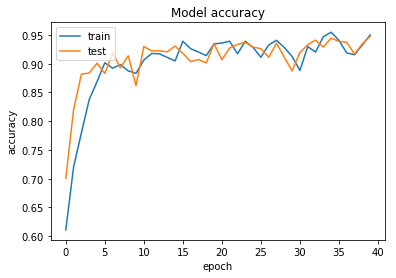

In [40]:
%matplotlib inline
fig = plt.gcf()
plt.plot(classifier.history['acc'])
plt.plot(classifier.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('Model_Accuracy.png')

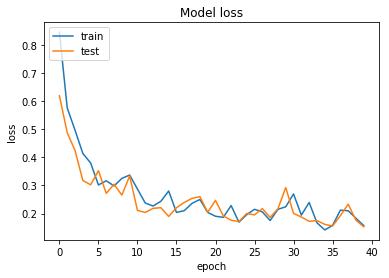

In [41]:
# summarize history for loss
fig = plt.gcf()
plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('Model_Loss.png')